# Crop Yield Prediction
### Md. Rubel Rana 1712661642
### Navid Al - Musabbir 1721853042

In [1]:
import graphviz
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
import autosklearn.regression
import autogluon.core as ag
from tpot import TPOTRegressor

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe

import autosklearn
import sklearn.metrics

from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

from autosklearn.classification import AutoSklearnClassifier


from supervised.automl import AutoML
from supervised.preprocessing.eda import EDA

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [2]:
# Dataset
dataset = 'dataset/Wheat/wheat.csv'

In [3]:
# Load dataset into dataframe
data = pd.read_csv(dataset)

## Data Exploration

In [4]:
data.shape

(726, 13)

In [5]:
data.columns

Index(['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT', 'Productions', 'PPH'],
      dtype='object')

In [6]:
data.head()

District   Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0         2   5645  1969    30.750    14.100       8.0     70.50  0.600   
1         3     75  1969    29.925    15.775      13.5     73.75  1.025   
2         4  15590  1969    31.400    16.950      14.0     76.25  0.300   
3         5  15570  1969    30.025    14.775       6.5     69.25  0.600   
4         6   6610  1969    28.975    13.250      24.5     73.50  0.200   

   Cloud  Sunshine  ALT  Productions          PPH  
0  1.575     9.200   20         3085  0.546501329  
1  2.375     8.875    6           30          0.4  
2  0.700     7.400   10         7410  0.475304682  
3  1.875     9.125    9         5240  0.336544637  
4  0.600     6.724   37         2725   0.41225416

In [7]:
data.tail()

District   Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
721        13      0  2012    31.325    15.000     19.00     79.75  2.275   
722        14  73957  2012    29.725    12.775     31.00     79.00  1.850   
723        16   6942  2012    28.975    13.125      3.50     79.00  1.775   
724        17    367  2012    31.625    15.225     13.75     74.50  3.000   
725        18  16364  2012    29.850    13.600     27.00     79.50  2.025   

     Cloud  Sunshine  ALT  Productions          PPH  
721  1.475     7.275    3            0      #DIV/0!  
722  1.600     6.025   20        97422  1.317278959  
723  1.800     5.425   34         7053  1.015989628  
724  2.050     6.900   35          350  0.953678474  
725  1.400     5.700   10        15515   0.94811782

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     726 non-null    int64  
 1   Area         726 non-null    int64  
 2   Year         726 non-null    int64  
 3   Max_Temp     726 non-null    float64
 4   Min_Temp     726 non-null    float64
 5   Rainfall     726 non-null    float64
 6   Humidity     726 non-null    float64
 7   Wind         726 non-null    float64
 8   Cloud        726 non-null    float64
 9   Sunshine     726 non-null    float64
 10  ALT          726 non-null    int64  
 11  Productions  726 non-null    int64  
 12  PPH          726 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 73.9+ KB


In [9]:
data.describe()

District           Area         Year    Max_Temp    Min_Temp  \
count  726.000000     726.000000   726.000000  726.000000  726.000000   
mean     9.057851   53889.410468  1990.673554   30.226240   14.791563   
std      5.007246   70653.613362    12.292281    0.994156    1.286256   
min      1.000000       0.000000  1969.000000   26.925000   11.525000   
25%      5.000000    1926.000000  1980.000000   29.625000   13.925000   
50%      9.000000   17900.000000  1991.000000   30.275000   14.700000   
75%     13.000000   80409.500000  2001.000000   30.850000   15.725000   
max     18.000000  400990.000000  2012.000000   33.125000   18.150000   

         Rainfall    Humidity        Wind       Cloud    Sunshine        ALT  \
count  726.000000  726.000000  726.000000  726.000000  726.000000  726.00000   
mean    16.927907   75.446440    0.836880    1.354580    7.423767   16.31405   
std     15.456945    4.446351    0.622512    0.375574    0.833999   13.88437   
min      0.000000   59.500000    0.025000    0.525000    3.450000    3.00000   
25%      5.500000   72.250000    0.475000    1.100000    6.950000    6.00000   
50%     13.125000   76.000000    0.675000    1.325000    7.450000   10.00000   
75%     24.500000   78.750000    0.975000    1.550000    7.925000   20.00000   
max    140.000000   91.250000    6.375000    3.225000    9.700000   63.00000   

         Productions  
count     726.000000  
mean    42135.377410  
std     62698.309089  
min         0.000000  
25%      1126.750000  
50%     12170.000000  
75%     66165.500000  
max    664380.000000

## Data Preprocessing

#### a. Removing 0's and NaN values

In [10]:
# Checking 0 values
(data == 0).sum(axis=0)

District        0
Area           26
Year            0
Max_Temp        0
Min_Temp        0
Rainfall       22
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions    27
PPH             0
dtype: int64

In [11]:
# Replace 0's with NaN
data.replace(0, np.nan, inplace=True)

In [12]:
data.isnull().sum().sum()

75

In [13]:
# Drop all NaN values
data = data.dropna()
data = data.reset_index(drop=True)

In [14]:
data.isnull().values.any()

False

In [15]:
# Be ensure about 0's and NaN values
(data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [16]:
data['Area'] = data.Area.astype(int)
data['Productions'] = data.Area.astype(int)
data['PPH'] = pd.to_numeric(data['PPH'])

In [17]:
data.shape

(677, 13)

In [18]:
data.head()

District   Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0         2   5645  1969    30.750    14.100       8.0     70.50  0.600   
1         3     75  1969    29.925    15.775      13.5     73.75  1.025   
2         4  15590  1969    31.400    16.950      14.0     76.25  0.300   
3         5  15570  1969    30.025    14.775       6.5     69.25  0.600   
4         6   6610  1969    28.975    13.250      24.5     73.50  0.200   

   Cloud  Sunshine  ALT  Productions       PPH  
0  1.575     9.200   20         5645  0.546501  
1  2.375     8.875    6           75  0.400000  
2  0.700     7.400   10        15590  0.475305  
3  1.875     9.125    9        15570  0.336545  
4  0.600     6.724   37         6610  0.412254

In [19]:
data.tail()

District   Area  Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
672        12  81792  2012    29.250    12.425     29.00      81.0  1.800   
673        14  73957  2012    29.725    12.775     31.00      79.0  1.850   
674        16   6942  2012    28.975    13.125      3.50      79.0  1.775   
675        17    367  2012    31.625    15.225     13.75      74.5  3.000   
676        18  16364  2012    29.850    13.600     27.00      79.5  2.025   

     Cloud  Sunshine  ALT  Productions       PPH  
672  1.375     6.000   14        81792  1.316914  
673  1.600     6.025   20        73957  1.317279  
674  1.800     5.425   34         6942  1.015990  
675  2.050     6.900   35          367  0.953678  
676  1.400     5.700   10        16364  0.948118

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     677 non-null    int64  
 1   Area         677 non-null    int64  
 2   Year         677 non-null    int64  
 3   Max_Temp     677 non-null    float64
 4   Min_Temp     677 non-null    float64
 5   Rainfall     677 non-null    float64
 6   Humidity     677 non-null    float64
 7   Wind         677 non-null    float64
 8   Cloud        677 non-null    float64
 9   Sunshine     677 non-null    float64
 10  ALT          677 non-null    int64  
 11  Productions  677 non-null    int64  
 12  PPH          677 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 68.9 KB


#### b. Removing Outliers 

In [21]:
z = np.abs(stats.zscore(data))

In [22]:
np.where(z > 4)

(array([ 99, 188, 221, 365, 396, 396, 415, 425, 446, 446, 447, 464, 487,
        487, 517, 517, 533, 533, 622, 626, 635, 640, 654, 663, 668]),
 array([ 5,  8,  8, 12,  1, 11,  5,  5,  8,  9, 12,  8,  1, 11,  1, 11,  1,
        11,  7,  7,  7,  7,  7,  7,  7]))

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [24]:
(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

District   Area   Year  Max_Temp  Min_Temp  Rainfall  Humidity   Wind  \
0       False  False  False     False     False     False     False  False   
1       False  False  False     False     False     False     False  False   
2       False  False  False     False     False     False     False  False   
3       False  False  False     False     False     False     False  False   
4       False  False  False     False     False     False     False  False   
..        ...    ...    ...       ...       ...       ...       ...    ...   
672     False  False  False     False     False     False     False   True   
673     False  False  False     False     False     False     False   True   
674     False  False  False     False     False     False     False   True   
675     False  False  False     False     False     False     False   True   
676     False  False  False     False     False     False     False   True   

     Cloud  Sunshine    ALT  Productions    PPH  
0    False     False  False        False  False  
1     True     False  False        False  False  
2    False     False  False        False  False  
3    False     False  False        False  False  
4    False     False  False        False  False  
..     ...       ...    ...          ...    ...  
672  False     False  False        False   True  
673  False     False  False        False   True  
674  False     False  False        False  False  
675  False     False  False        False  False  
676  False     False  False        False  False  

[677 rows x 13 columns]

In [25]:
data.shape

(677, 13)

In [26]:
data = data[(z < 4).all(axis=1)]

In [27]:
data.shape

(657, 13)

## Spliting Data

In [28]:
X = data[['District', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = data['PPH']

#### a. Train data & Test data

In [29]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.3)

#### a. Train data & Validation data

In [30]:
X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3)

## 1. Performing Automating EDA

Considering 7 the most frequent values
Considering 7 the most frequent values
Considering 7 the most frequent values


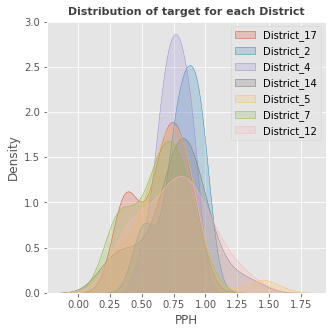

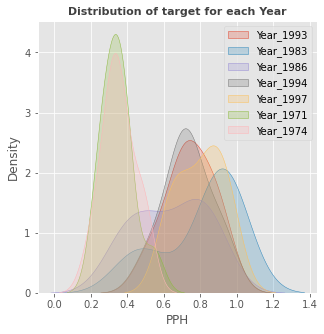

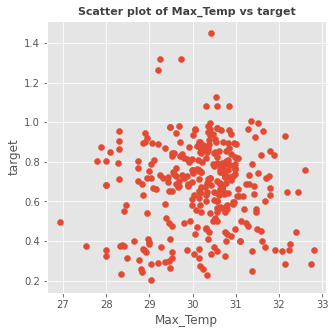

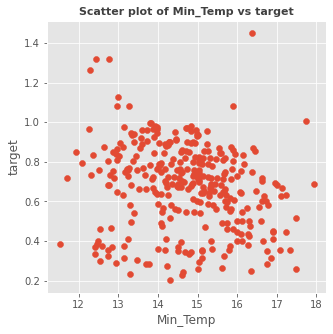

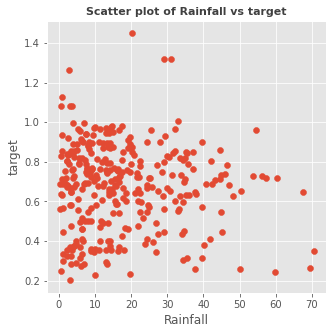

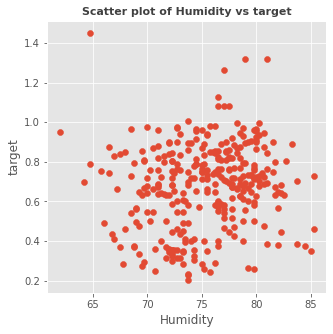

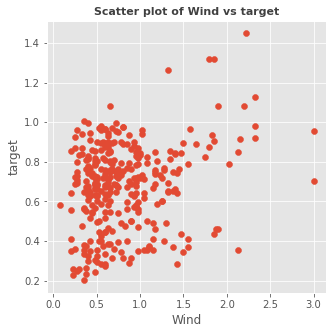

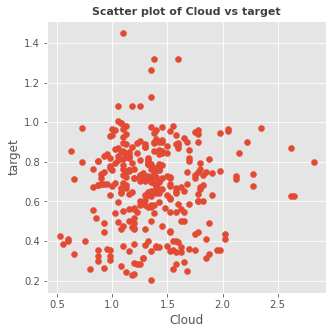

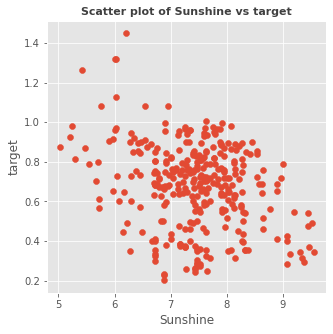

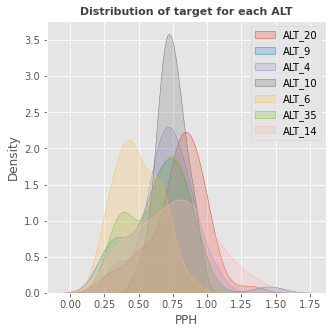

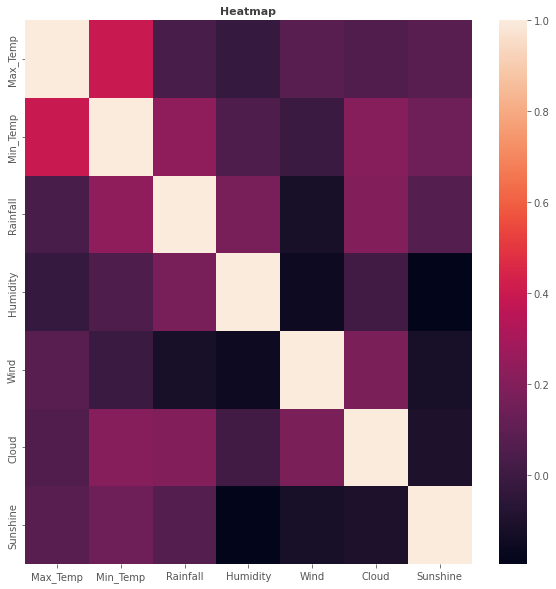

In [31]:
EDA.extensive_eda(X_train,y_valid,save_path="content/mljar-supervised/wheat")

## Creating AutoML Models

In [32]:
automl = AutoML(mode='Compete',
                total_time_limit=10,
                results_path="AutoML_classifier/Wheat")

In [33]:
automl.fit(X_train, y_valid)

This model has already been fitted. You can use predict methods or select a new 'results_path' for a new 'fit()'.


In [34]:
predictions = automl.predict(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


#### a. RMSE

In [35]:
metrics.mean_squared_error(y_test, predictions)

0.013860209635522225

#### b. MAE

In [36]:
metrics.mean_absolute_error(y_test, predictions)

0.08916150393850863

#### c. R2

In [37]:
metrics.r2_score(y_test, predictions)

0.6631795190792037

In [38]:
y_pred = automl.predict(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


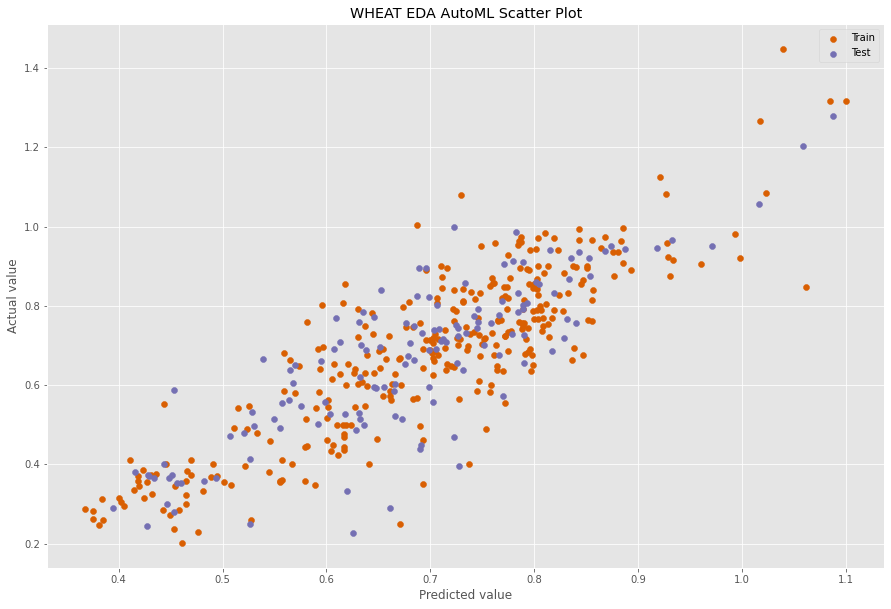

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('WHEAT EDA AutoML Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/wheat_eda_automl_scatter.png")
plt.show()

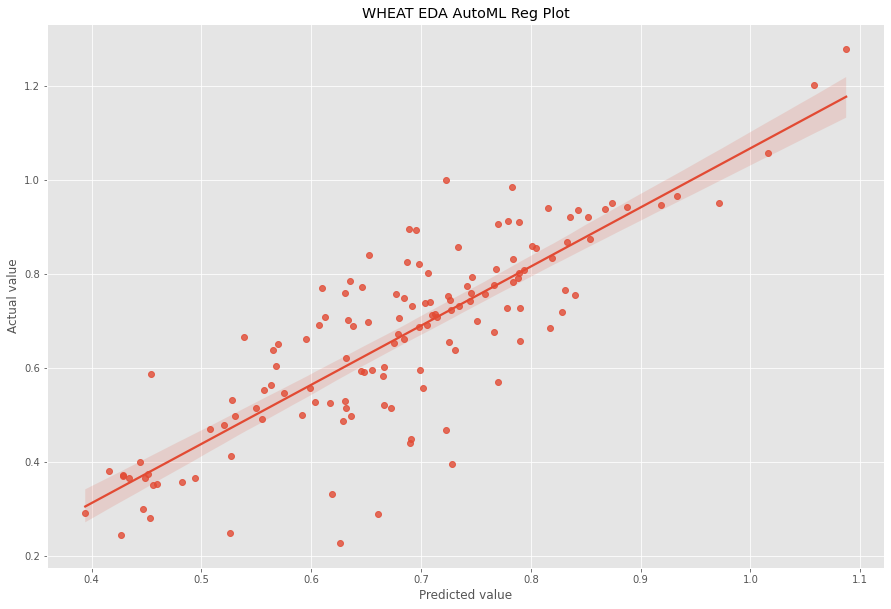

In [40]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('WHEAT EDA AutoML Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/wheat_eda_automl_reg.png")

## 2. AutoSklearn Regression

In [41]:
autosk = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='autosklearn_regression/wheat',
    resampling_strategy='holdout',
    resampling_strategy_arguments={'folds': 5},
)

In [42]:
autosk.fit(X_train, y_valid, dataset_name='data')

AutoSklearnRegressor(per_run_time_limit=30,
                     resampling_strategy_arguments={'folds': 5},
                     time_left_for_this_task=120,
                     tmp_folder='autosklearn_regression/wheat')

In [43]:
autosk.leaderboard()

rank  ensemble_weight               type      cost  duration
model_id                                                              
7            1             0.56  gradient_boosting  0.402526  1.277111
16           2             0.26        extra_trees  0.404665  1.297841
17           3             0.06   gaussian_process  0.439047  1.304662
5            4             0.12   gaussian_process  0.497428  9.254313

In [44]:
print(autosk.show_models())

[(0.560000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'quantile_transformer', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:n_quantiles': 952, 'data_preprocessing:numerical_transformer:rescaling:quantile_transformer:output_distribution': 'uniform', 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 1.8428972335335263e-10, 'regressor:gradient_boosting:learning_rate': 0.012607824914758717, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gr

In [45]:
predictions = autosk.predict(X_test)

#### a. RMSE

In [46]:
metrics.mean_squared_error(y_test, predictions)

0.01619819792716033

#### b. MAE

In [47]:
metrics.mean_absolute_error(y_test, predictions)

0.09199125304149995

#### c. R2

In [48]:
metrics.r2_score(y_test, predictions)

0.6063634707303747

In [49]:
y_pred = autosk.predict(X_train)

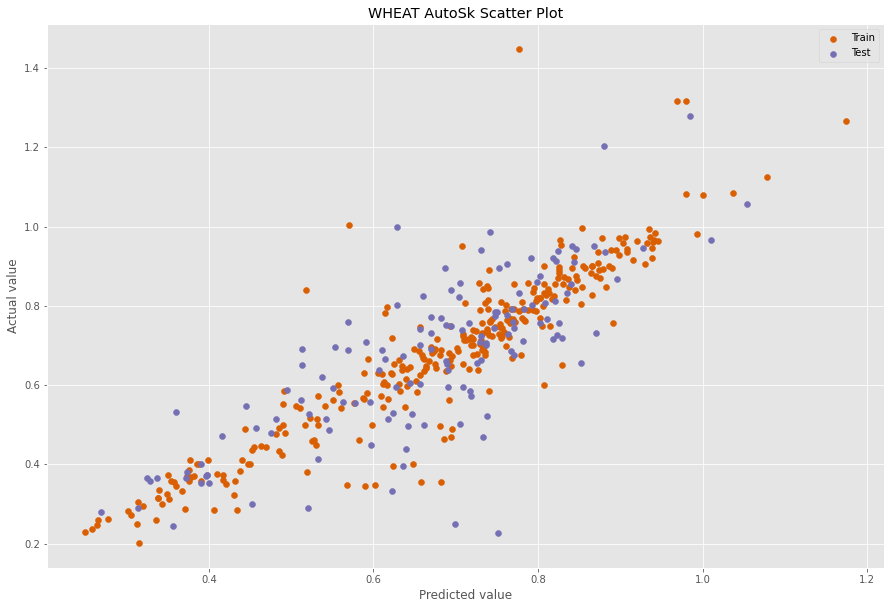

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_valid, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('WHEAT AutoSk Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/wheat_autosk_scatter.png")
plt.show()

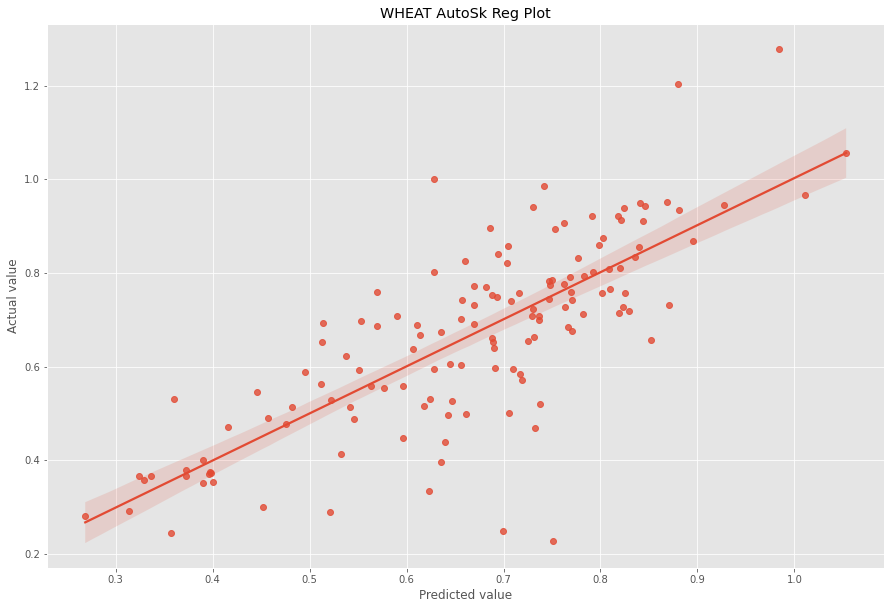

In [51]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('WHEAT AutoSk Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/wheat_autosk_reg.png")

## 3. AutoGluon

In [52]:
train_data = TabularDataset('dataset/Wheat/train_data.csv')

In [53]:
test_data = TabularDataset('dataset/Wheat/test_data.csv')

In [54]:
# Checking 0 values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District        0
Area            5
Year            0
Max_Temp        0
Min_Temp        0
Rainfall       12
Humidity        0
Wind            0
Cloud           0
Sunshine        0
ALT             0
Productions     5
PPH             0
dtype: int64

In [55]:
# Replace 0's with NaN
train_data.replace(0, np.nan, inplace=True)
test_data.replace(0, np.nan, inplace=True)

In [56]:
train_data.isnull().sum().sum()
test_data.isnull().sum().sum()

22

In [57]:
# Drop all NaN values
train_data = train_data.dropna()
train_data = train_data.reset_index(drop=True)
test_data = test_data.dropna()
test_data = test_data.reset_index(drop=True)

In [58]:
train_data.isnull().values.any()
test_data.isnull().values.any()

False

In [59]:
# Be ensure about 0's and NaN values
(train_data == 0).sum(axis=0)
(test_data == 0).sum(axis=0)

District       0
Area           0
Year           0
Max_Temp       0
Min_Temp       0
Rainfall       0
Humidity       0
Wind           0
Cloud          0
Sunshine       0
ALT            0
Productions    0
PPH            0
dtype: int64

In [60]:
train_data['Area'] = train_data.Area.astype(int)
train_data['Productions'] = train_data.Area.astype(int)
train_data['PPH'] = pd.to_numeric(train_data['PPH'])
test_data['Area'] = test_data.Area.astype(int)
test_data['Productions'] = test_data.Area.astype(int)
test_data['PPH'] = pd.to_numeric(test_data['PPH'])

In [61]:
label = 'PPH'

In [62]:
data[label].describe()

count    657.000000
mean       0.677897
std        0.213670
min        0.069919
25%        0.528666
50%        0.705841
75%        0.831442
max        1.448037
Name: PPH, dtype: float64

In [63]:
save_path = 'autogluon/wheat'

In [64]:
hyperparameters = {
    'NN': {'num_epochs': 10, 'activation': 'relu', 'dropout_prob': ag.Real(0.0, 0.5)},
    'GBM': {'num_boost_round': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)},
    'XGB': {'n_estimators': 1000, 'learning_rate': ag.Real(0.01, 0.1, log=True)}
}

In [65]:
predictor = TabularPredictor(label=label, path=save_path).fit(
    train_data, hyperparameters=hyperparameters, hyperparameter_tune_kwargs='auto', time_limit=60
)

[WARNING] [2021-09-18 23:59:23,289:autogluon.core.utils.utils] Warning: path already exists! This predictor may overwrite an existing predictor! path="autogluon/wheat"
[WARNING] [2021-09-18 23:59:23,291:root] Warning: hyperparameter tuning is currently experimental and may cause the process to hang.


In [66]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -0.826567       0.044825  19.859576                0.000293           0.221448            2       True         18
1            XGBoost/T0  -0.827153       0.035857  11.882671                0.035857          11.882671            1       True          7
2           LightGBM/T2  -0.828428       0.004741   1.687993                0.004741           1.687993            1       True          3
3           LightGBM/T5  -0.828457       0.005606   7.404523                0.005606           7.404523            1       True          6
4           LightGBM/T0  -0.830464       0.016810   2.032644                0.016810           2.032644            1       True          1
5     NeuralNetMXNet/T7  -0.830580       0.003070   0.350934                0.003070           0.350934 

AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"


{'model_types': {'LightGBM/T0': 'LGBModel',
  'LightGBM/T1': 'LGBModel',
  'LightGBM/T2': 'LGBModel',
  'LightGBM/T3': 'LGBModel',
  'LightGBM/T4': 'LGBModel',
  'LightGBM/T5': 'LGBModel',
  'XGBoost/T0': 'XGBoostModel',
  'NeuralNetMXNet/T0': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T1': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T2': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T3': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T4': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T5': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T6': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T7': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T8': 'TabularNeuralNetModel',
  'NeuralNetMXNet/T9': 'TabularNeuralNetModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T0': -0.8304644112525551,
  'LightGBM/T1': -0.8316769242040667,
  'LightGBM/T2': -0.8284279296035942,
  'LightGBM/T3': -0.8335029731420265,
  'LightGBM/T4': -0.8329013489639499,
  'LightGBM/T5': -0.8284568094574811,

In [67]:
perf = predictor.evaluate(test_data)

In [68]:
y_pred = predictor.predict_proba(test_data)

In [69]:
perf = predictor.evaluate_predictions(y_true=test_data[label], y_pred=y_pred, auxiliary_metrics=True)

In [70]:
perf

{'root_mean_squared_error': -0.1897849440752917,
 'mean_squared_error': -0.0360183249976616,
 'mean_absolute_error': -0.1456557273048706,
 'r2': 0.28292626784738084,
 'pearsonr': 0.5489335288261096,
 'median_absolute_error': -0.1272215356892395}

## 4. Hyperopt

In [71]:
n_iter=10

In [72]:
num_folds=2

In [73]:
kf = KFold(n_splits=num_folds, random_state=None)

In [74]:
model = LGBMRegressor(random_state=42)

#### a. RMSE

In [75]:
abs(cross_val_score(model, X, y, scoring='neg_mean_squared_error')).mean()

0.03354628153481555

#### b. MAE

In [76]:
abs(cross_val_score(model, X, y, scoring='neg_mean_absolute_error')).mean()

0.14205718472023177

#### c. R2

In [77]:
abs(cross_val_score(model, X, y, scoring='r2')).mean()

0.40557378626282625

## 5. TPOT

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [79]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [80]:
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.017881995114024555

Generation 2 - Current best internal CV score: -0.017130164375025972

Generation 3 - Current best internal CV score: -0.014583539229064604

Generation 4 - Current best internal CV score: -0.014583539229064604

Generation 5 - Current best internal CV score: -0.014583539229064604

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=5, min_samples_split=11, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, random_state=42, verbosity=2)

In [81]:
predictions = tpot.predict(X_test)

#### b. RMSE

In [82]:
metrics.mean_squared_error(y_test, predictions)

0.017365082311104195

#### b. MAE

In [83]:
metrics.mean_absolute_error(y_test, predictions)

0.09297448568567816

#### c. R2

In [84]:
metrics.r2_score(y_test, predictions)

0.6367922333099818

In [85]:
y_pred = tpot.predict(X_train)

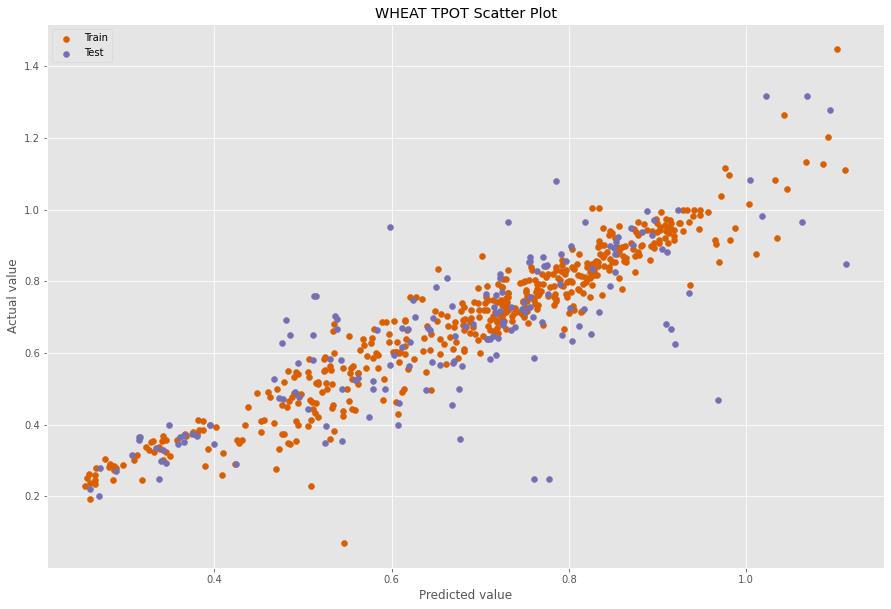

In [86]:
plt.figure(figsize=(15,10))
plt.scatter(y_pred, y_train, label="Train", color='#d95f02')
plt.scatter(predictions, y_test, label="Test", color='#7570b3')
plt.title('WHEAT TPOT Scatter Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend()
plt.savefig("fig_content/wheat_tpot_scater.png")
plt.show()

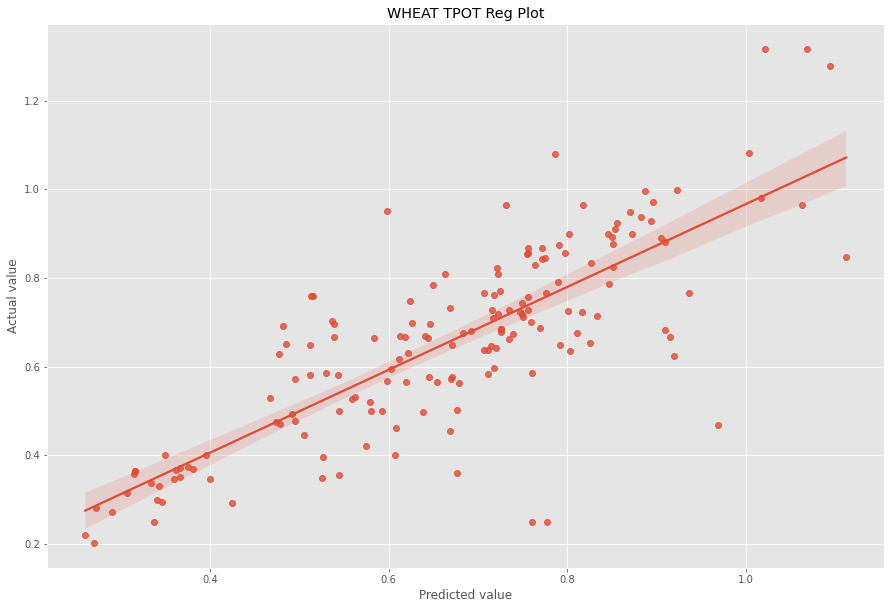

In [88]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y = y_test, data = data)
plt.title('WHEAT TPOT Reg Plot')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("reg_content/wheat_tpot_reg.png")

## 6. EvalML => AutoMLSearch

In [89]:
import evalml
from evalml import AutoMLSearch

In [90]:
X_train, X_holdout, y_train, y_holdout = evalml.preprocessing.split_data(X, y, problem_type='regression', test_size=0.3, random_seed=0)

In [91]:
automl = AutoMLSearch(X_train = X_train, y_train=y_train, problem_type = "regression",max_batches=1,optimize_thresholds=True)
automl.search()

Parameters for components {'Baseline Classifier'} will not be used to instantiate the pipeline since they don't appear in the pipeline


In [92]:
automl.rankings

id                                      pipeline_name  search_order  \
0   3                       XGBoost Regressor w/ Imputer             3   
1   5                 Random Forest Regressor w/ Imputer             5   
2   7                      LightGBM Regressor w/ Imputer             7   
3   2                   Extra Trees Regressor w/ Imputer             2   
4   1  Elastic Net Regressor w/ Imputer + Standard Sc...             1   
5   6                 Decision Tree Regressor w/ Imputer             6   
6   4                      CatBoost Regressor w/ Imputer             4   
7   0                  Mean Baseline Regression Pipeline             0   

   mean_cv_score  standard_deviation_cv_score  validation_score  \
0       0.581135                     0.075981          0.637855   
1       0.564966                     0.063509          0.633299   
2       0.550119                     0.043507          0.599049   
3       0.543089                     0.004996          0.548852   
4       0.365091                     0.011327          0.363609   
5       0.364873                     0.032025          0.350885   
6       0.154992                     0.019427          0.176138   
7      -0.001751                     0.001585         -0.001476   

   percent_better_than_baseline  high_variance_cv  \
0                  33283.891870             False   
1                  32360.609591             False   
2                  31512.812660             False   
3                  31111.415237             False   
4                  20947.394327             False   
5                  20934.907127             False   
6                   8950.339910             False   
7                      0.000000             False   

                                          parameters  
0  {'Imputer': {'categorical_impute_strategy': 'm...  
1  {'Imputer': {'categorical_impute_strategy': 'm...  
2  {'Imputer': {'categorical_impute_strategy': 'm...  
3  {'Imputer': {'categorical_impute_strategy': 'm...  
4  {'Imputer': {'categorical_impute_strategy': 'm...  
5  {'Imputer': {'categorical_impute_strategy': 'm...  
6  {'Imputer': {'categorical_impute_strategy': 'm...  
7       {'Baseline Regressor': {'strategy': 'mean'}}

In [93]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = RegressionPipeline(component_graph={'Imputer': ['Imputer', 'X', 'y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Imputer.x', 'y']}, parameters={'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'XGBoost Regressor':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1}}, random_seed=0)

In [94]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


********************************
* XGBoost Regressor w/ Imputer *
********************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. XGBoost Regressor
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1

Training
Training for regression problems.
Total training time (including CV): 3.1 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.638        0.642     0.486     0.072 0.015 0.092                    0.121        306          153
1           0.611        0.612     0.410     0.082 0.016 0.098                    0.125        306          153
2           0.495        0.496     0.790     0.085 0.025 0.111                    0.159        306

In [95]:
automl.describe_pipeline(1)


******************************************************
* Elastic Net Regressor w/ Imputer + Standard Scaler *
******************************************************

Problem Type: regression
Model Family: Linear

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Standard Scaler
3. Elastic Net Regressor
	 * alpha : 0.0001
	 * l1_ratio : 0.15
	 * max_iter : 1000
	 * normalize : False

Training
Training for regression problems.
Total training time (including CV): 0.6 seconds

Cross Validation
----------------
               R2  ExpVariance  MaxError  MedianAE   MSE   MAE  Root Mean Squared Error # Training # Validation
0           0.364        0.373     0.602     0.104 0.026 0.126                    0.161        306          153
1           0.355        0.359     0.443     0.095 0.026 0.124                    0.161        306          153
2           0.377        

In [96]:
automl.results

{'pipeline_results': {0: {'id': 0,
   'pipeline_name': 'Mean Baseline Regression Pipeline',
   'pipeline_class': evalml.pipelines.regression_pipeline.RegressionPipeline,
   'pipeline_summary': 'Baseline Regressor',
   'parameters': {'Baseline Regressor': {'strategy': 'mean'}},
   'mean_cv_score': -0.001751256671241208,
   'standard_deviation_cv_score': 0.0015854134765169792,
   'high_variance_cv': False,
   'training_time': 0.10413599014282227,
   'cv_data': [{'all_objective_scores': OrderedDict([('R2',
                   -0.001475824504799883),
                  ('ExpVariance', 2.220446049250313e-16),
                  ('MaxError', 0.5866445726633986),
                  ('MedianAE', 0.15495233066339875),
                  ('MSE', 0.04074876955198018),
                  ('MAE', 0.1671974629496561),
                  ('Root Mean Squared Error', 0.20186324467812405),
                  ('# Training', 306),
                  ('# Validation', 153)]),
     'mean_cv_score': -0.001475824504799

In [97]:
evalml.objectives.get_all_objective_names()

['expvariance',
 'maxerror',
 'medianae',
 'mse',
 'mae',
 'r2',
 'mean squared log error',
 'root mean squared log error',
 'root mean squared error',
 'mean absolute percentage error',
 'mcc multiclass',
 'log loss multiclass',
 'auc weighted',
 'auc macro',
 'auc micro',
 'recall weighted',
 'recall macro',
 'recall micro',
 'precision weighted',
 'precision macro',
 'precision micro',
 'f1 weighted',
 'f1 macro',
 'f1 micro',
 'balanced accuracy multiclass',
 'accuracy multiclass',
 'mcc binary',
 'log loss binary',
 'gini',
 'auc',
 'recall',
 'precision',
 'f1',
 'balanced accuracy binary',
 'accuracy binary',
 'sensitivity at low alert rates',
 'lead scoring',
 'fraud cost',
 'cost benefit matrix']

## Graphical Representation

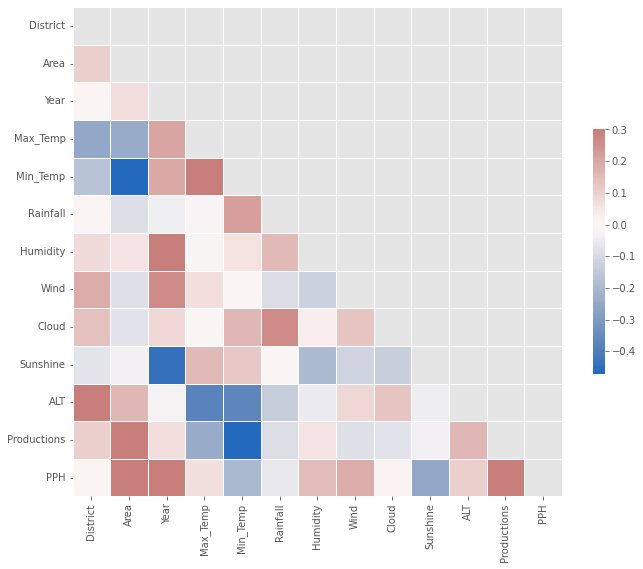

In [98]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 720x720 with 0 Axes>

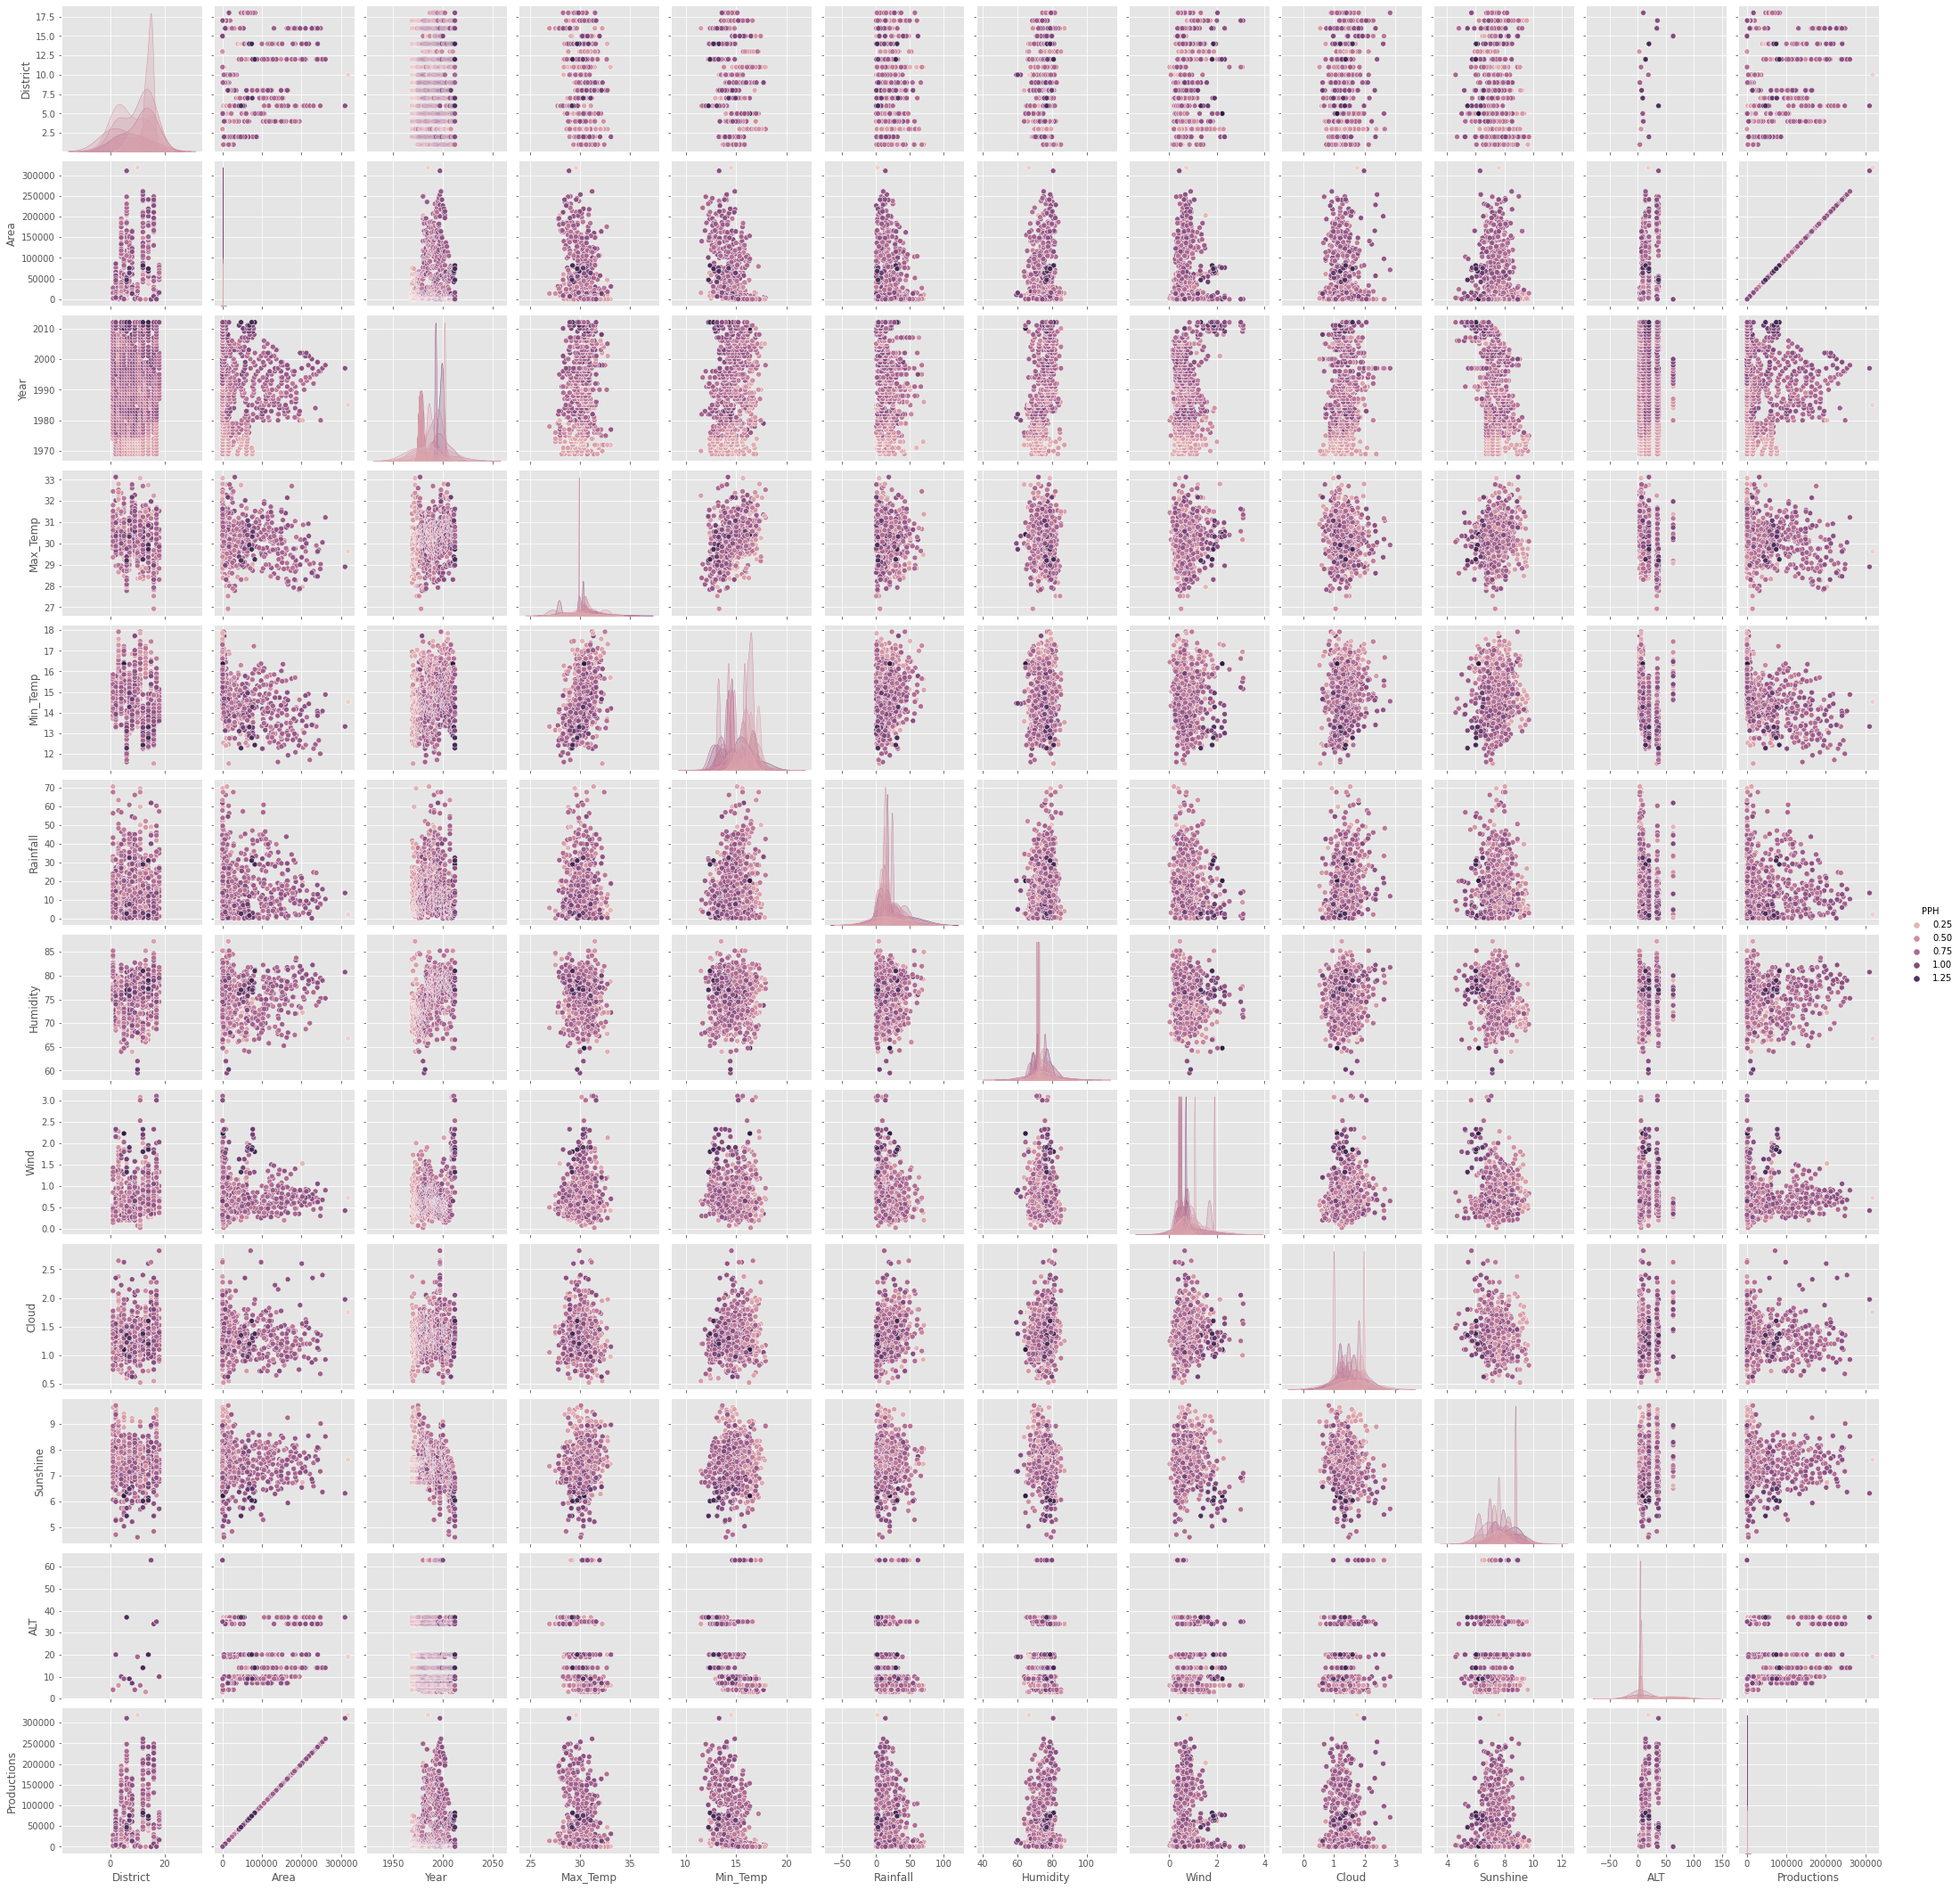

In [99]:
plt.figure(figsize=(10, 10))
sns.pairplot(data, hue='PPH');

In [100]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "Rainfall", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [101]:
pio.templates.default = "seaborn"
plt.figure(figsize=(10, 10))
fig = px.line(data, x = "Cloud", y = "Rainfall", color = "Cloud")
fig.show()

<Figure size 720x720 with 0 Axes>

In [102]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Humidity", y = "Rainfall", color = "Humidity")
fig.show()

<Figure size 1152x1152 with 0 Axes>

In [103]:
pio.templates.default = "seaborn"
plt.figure(figsize=(16, 16))
fig = px.line(data, x = "Year", y = "PPH", color = "Year")
fig.show()

<Figure size 1152x1152 with 0 Axes>